<a href="https://colab.research.google.com/github/vanessacampoy/vanessacampoy/blob/main/analise_voos_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalar bibliotecas necessárias (caso ainda não venham por padrão)
!pip install pandas matplotlib seaborn openpyxl


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração opcional para gráficos ficarem mais bonitos
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [8]:
from google.colab import files

uploaded = files.upload()


KeyboardInterrupt: 

In [9]:
import os

# lista todos os arquivos disponíveis no ambiente do Colab
os.listdir()


['.config',
 'AIRLINE_CODE_DICTIONARY (1).xlsx',
 'DOT_CODE_DICTIONARY (1).xlsx',
 'DOT_CODE_DICTIONARY.xlsx',
 'AIRLINE_CODE_DICTIONARY.xlsx',
 'sample_data']

In [10]:
uploaded = files.upload()


Saving flights_202301.xlsx to flights_202301.xlsx


In [11]:
os.listdir()


['.config',
 'flights_202301.xlsx',
 'AIRLINE_CODE_DICTIONARY (1).xlsx',
 'DOT_CODE_DICTIONARY (1).xlsx',
 'DOT_CODE_DICTIONARY.xlsx',
 'AIRLINE_CODE_DICTIONARY.xlsx',
 'sample_data']

In [12]:
import pandas as pd

# Base principal de voos
flights = pd.read_excel("flights_202301.xlsx")

# Dicionários
airline_dict = pd.read_excel("AIRLINE_CODE_DICTIONARY.xlsx")
dot_dict = pd.read_excel("DOT_CODE_DICTIONARY.xlsx")

# Conferir rapidamente as primeiras linhas de cada base
print("Voos:")
display(flights.head())

print("Dicionário AIRLINE:")
display(airline_dict.head())

print("Dicionário DOT:")
display(dot_dict.head())


Voos:


,FL_DATE,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,...,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FL_YEAR,FL_MONTH,FL_DAY
0,2023-01-02,9E,20363,4628,BDL,"Hartford, CT",LGA,"New York, NY",800,757.0,...,25.0,101,NaN,NaN,NaN,NaN,NaN,2023,1,2
1,2023-01-03,9E,20363,4628,BDL,"Hartford, CT",LGA,"New York, NY",800,755.0,...,37.0,101,NaN,NaN,NaN,NaN,NaN,2023,1,3
2,2023-01-04,9E,20363,4628,BDL,"Hartford, CT",LGA,"New York, NY",800,755.0,...,28.0,101,NaN,NaN,NaN,NaN,NaN,2023,1,4
3,2023-01-05,9E,20363,4628,BDL,"Hartford, CT",LGA,"New York, NY",800,754.0,...,38.0,101,NaN,NaN,NaN,NaN,NaN,2023,1,5
4,2023-01-06,9E,20363,4628,BDL,"Hartford, CT",LGA,"New York, NY",800,759.0,...,28.0,101,NaN,NaN,NaN,NaN,NaN,2023,1,6


Dicionário AIRLINE:


,Coluna1,Coluna2
0,Code,Description
1,02Q,Titan Airways
2,04Q,Tradewind Aviation
3,05Q,"Comlux Aviation, AG"
4,06Q,Master Top Linhas Aereas Ltd.


Dicionário DOT:


,Code,Description
0,19031,Mackey International Inc.: MAC
1,19032,Munz Northern Airlines Inc.: XY
2,19033,Cochise Airlines Inc.: COC
3,19034,Golden Gate Airlines Inc.: GSA
4,19035,Aeromech Inc.: RZZ


In [13]:
# Verificar nomes das colunas
print(flights.columns)

# Verificar quantidade de linhas e colunas
print("Formato:", flights.shape)

# Conferir valores nulos em cada coluna
print(flights.isnull().sum())

# Estatísticas básicas para variáveis numéricas
print(flights.describe())


Index(['FL_DATE', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN',
       'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED',
       'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER',
       'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT',
       'FL_YEAR', 'FL_MONTH', 'FL_DAY'],
      dtype='object')
Formato: (538837, 33)
FL_DATE                         0
AIRLINE_CODE                    0
DOT_CODE                        0
FL_NUMBER                       0
ORIGIN                          0
ORIGIN_CITY                     0
DEST                            0
DEST_CITY                       0
CRS_DEP_TIME                    0
DEP_TIME                     9978
DEP_DELAY                    9982
TAXI_OUT                    10197
WHEELS_OFF    

In [15]:
flights.duplicated().sum()


np.int64(0)

In [16]:
flights.duplicated(subset=["FL_DATE", "AIRLINE_CODE", "FL_NUMBER"]).sum()


np.int64(98710)

In [17]:
# 1) Duplicados considerando TODAS as colunas (linha idêntica)
dup_all = flights.duplicated().sum()
print(f"[1] Duplicados (todas as colunas): {dup_all}")

# 2) Duplicados na chave quase única: (FL_DATE, AIRLINE_CODE, FL_NUMBER)
key1 = ["FL_DATE", "AIRLINE_CODE", "FL_NUMBER"]
dup_key1 = flights.duplicated(subset=key1).sum()
print(f"[2] Duplicados na chave {key1}: {dup_key1}")

# Mostrar alguns exemplos (se existirem)
if dup_key1 > 0:
    print("\nExemplos de duplicados (key1):")
    display(
        flights[
            flights.duplicated(subset=key1, keep=False)
        ].sort_values(key1).head(10)
    )

# 3) Chave mais forte: (FL_DATE, AIRLINE_CODE, FL_NUMBER, ORIGIN, DEST)
key2 = ["FL_DATE", "AIRLINE_CODE", "FL_NUMBER", "ORIGIN", "DEST"]
dup_key2 = flights.duplicated(subset=key2).sum()
print(f"[3] Duplicados na chave {key2}: {dup_key2}")

# Mostrar alguns exemplos (se existirem)
if dup_key2 > 0:
    print("\nExemplos de duplicados (key2):")
    display(
        flights[
            flights.duplicated(subset=key2, keep=False)
        ].sort_values(key2).head(10)
    )

# 4) (Opcional) Sanidade: proporção de registros únicos por chave
unique_key1 = flights[key1].drop_duplicates().shape[0]
unique_key2 = flights[key2].drop_duplicates().shape[0]
total = flights.shape[0]
print(f"\n[4] Registros únicos por key1: {unique_key1} de {total} ({unique_key1/total:.2%})")
print(f"[4] Registros únicos por key2: {unique_key2} de {total} ({unique_key2/total:.2%})")


[1] Duplicados (todas as colunas): 0
[2] Duplicados na chave ['FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER']: 98710

Exemplos de duplicados (key1):


,FL_DATE,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,...,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FL_YEAR,FL_MONTH,FL_DAY
219,2023-01-01,9E,20363,4639,ATL,"Atlanta, GA",ILM,"Wilmington, NC",900,856.0,...,57.0,377,NaN,NaN,NaN,NaN,NaN,2023,1,1
244,2023-01-01,9E,20363,4639,ILM,"Wilmington, NC",ATL,"Atlanta, GA",1103,1101.0,...,66.0,377,NaN,NaN,NaN,NaN,NaN,2023,1,1
451,2023-01-01,9E,20363,4650,GSP,"Greer, SC",LGA,"New York, NY",1345,1340.0,...,82.0,610,NaN,NaN,NaN,NaN,NaN,2023,1,1
454,2023-01-01,9E,20363,4650,LGA,"New York, NY",GSP,"Greer, SC",1030,1028.0,...,91.0,610,NaN,NaN,NaN,NaN,NaN,2023,1,1
725,2023-01-01,9E,20363,4666,ATL,"Atlanta, GA",CHA,"Chattanooga, TN",1340,1333.0,...,26.0,106,NaN,NaN,NaN,NaN,NaN,2023,1,1
733,2023-01-01,9E,20363,4666,CHA,"Chattanooga, TN",ATL,"Atlanta, GA",1552,1549.0,...,24.0,106,NaN,NaN,NaN,NaN,NaN,2023,1,1
801,2023-01-01,9E,20363,4668,AVL,"Asheville, NC",LGA,"New York, NY",1200,1219.0,...,78.0,599,NaN,NaN,NaN,NaN,NaN,2023,1,1
818,2023-01-01,9E,20363,4668,LGA,"New York, NY",AVL,"Asheville, NC",835,832.0,...,174.0,599,0.0,0.0,26.0,0.0,0.0,2023,1,1
925,2023-01-01,9E,20363,4672,ATL,"Atlanta, GA",GNV,"Gainesville, FL",1510,1508.0,...,46.0,300,NaN,NaN,NaN,NaN,NaN,2023,1,1
949,2023-01-01,9E,20363,4672,GNV,"Gainesville, FL",ATL,"Atlanta, GA",1710,1728.0,...,52.0,300,18.0,0.0,40.0,0.0,0.0,2023,1,1


[3] Duplicados na chave ['FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST']: 0

[4] Registros únicos por key1: 440127 de 538837 (81.68%)
[4] Registros únicos por key2: 538837 de 538837 (100.00%)


Valores únicos por coluna:


,0
FL_NUMBER,5874
DISTANCE,1462
WHEELS_ON,1440
ARR_TIME,1440
WHEELS_OFF,1410
DEP_TIME,1407
CRS_ARR_TIME,1305
CRS_DEP_TIME,1212
ARR_DELAY,1136
DEP_DELAY,1110


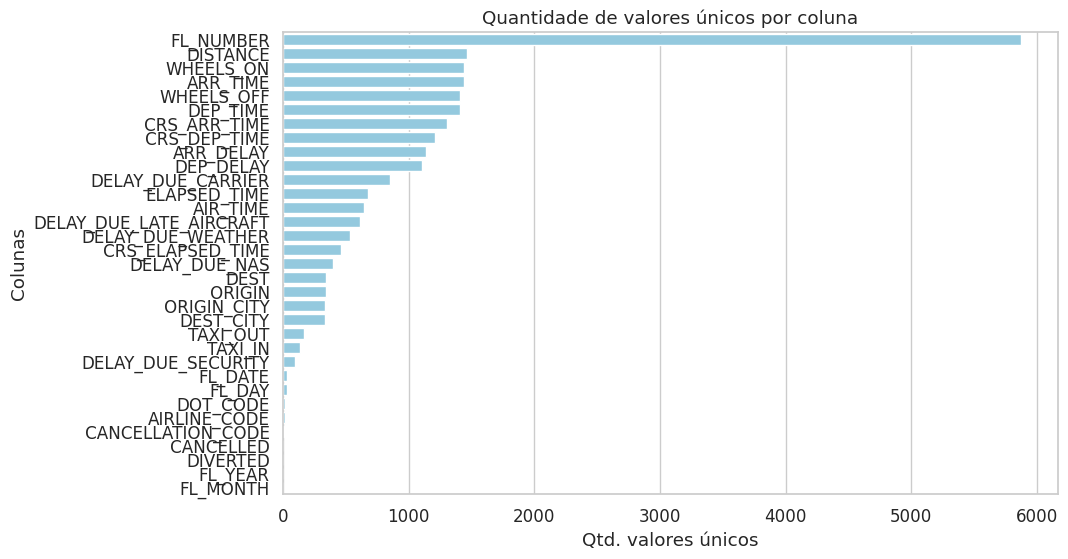

In [18]:
# Contagem de valores únicos por coluna
unique_counts = flights.nunique().sort_values(ascending=False)

print("Valores únicos por coluna:")
display(unique_counts)

# (Opcional) Visualizar de forma gráfica
plt.figure(figsize=(10,6))
sns.barplot(x=unique_counts.values, y=unique_counts.index, color="skyblue")
plt.title("Quantidade de valores únicos por coluna")
plt.xlabel("Qtd. valores únicos")
plt.ylabel("Colunas")
plt.show()


In [19]:
# Criar chave técnica FLIGHT_ID
flights["FLIGHT_ID"] = (
    flights["FL_DATE"].astype(str) + "_" +
    flights["AIRLINE_CODE"].astype(str) + "_" +
    flights["FL_NUMBER"].astype(str) + "_" +
    flights["ORIGIN"].astype(str) + "_" +
    flights["DEST"].astype(str)
)

# Testar unicidade
total_registros = flights.shape[0]
unicos = flights["FLIGHT_ID"].nunique()

print(f"Total de registros: {total_registros}")
print(f"Total de IDs únicos: {unicos}")
print(f"Percentual de unicidade: {unicos/total_registros:.2%}")


Total de registros: 538837
Total de IDs únicos: 538837
Percentual de unicidade: 100.00%


In [20]:
# 1. Checar valores negativos em colunas de atraso/tempo
colunas_tempo = [
    "DEP_DELAY", "ARR_DELAY", "TAXI_OUT", "TAXI_IN",
    "ELAPSED_TIME", "AIR_TIME", "CRS_ELAPSED_TIME",
    "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER",
    "DELAY_DUE_NAS", "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT"
]

for col in colunas_tempo:
    min_val = flights[col].min()
    max_val = flights[col].max()
    print(f"{col}: min={min_val}, max={max_val}")

# 2. Checar colunas binárias
print("\nValores únicos CANCELLED:", flights["CANCELLED"].unique())
print("Valores únicos DIVERTED:", flights["DIVERTED"].unique())

# 3. Checar códigos de cancelamento
print("\nValores únicos CANCELLATION_CODE:", flights["CANCELLATION_CODE"].unique())


DEP_DELAY: min=-52.0, max=3024.0
ARR_DELAY: min=-80.0, max=3063.0
TAXI_OUT: min=1.0, max=222.0
TAXI_IN: min=1.0, max=173.0
ELAPSED_TIME: min=17.0, max=749.0
AIR_TIME: min=8.0, max=695.0
CRS_ELAPSED_TIME: min=26.0, max=685.0
DELAY_DUE_CARRIER: min=0.0, max=3024.0
DELAY_DUE_WEATHER: min=0.0, max=1653.0
DELAY_DUE_NAS: min=0.0, max=1343.0
DELAY_DUE_SECURITY: min=0.0, max=234.0
DELAY_DUE_LATE_AIRCRAFT: min=0.0, max=2027.0

Valores únicos CANCELLED: [0 1]
Valores únicos DIVERTED: [0 1]

Valores únicos CANCELLATION_CODE: ['Z' 'C' 'B' 'D' 'A']


In [21]:
# Converter data
flights["FL_DATE"] = pd.to_datetime(flights["FL_DATE"])

# Converter colunas binárias para boolean
flights["CANCELLED"] = flights["CANCELLED"].astype(bool)
flights["DIVERTED"] = flights["DIVERTED"].astype(bool)

# Converter colunas categóricas
categoricas = [
    "AIRLINE_CODE", "DOT_CODE", "ORIGIN", "DEST",
    "ORIGIN_CITY", "DEST_CITY", "CANCELLATION_CODE",
    "FL_YEAR", "FL_MONTH", "FL_DAY"
]
for col in categoricas:
    flights[col] = flights[col].astype("category")

# Conferir resultado
flights.dtypes


,0
FL_DATE,datetime64[ns]
AIRLINE_CODE,category
DOT_CODE,category
FL_NUMBER,int64
ORIGIN,category
ORIGIN_CITY,category
DEST,category
DEST_CITY,category
CRS_DEP_TIME,int64
DEP_TIME,float64


In [22]:
import numpy as np

# Período do dia
def get_periodo(hora):
    if pd.isna(hora): return np.nan
    hora = int(str(hora).zfill(4)[:2])  # pega só as horas do formato HHMM
    if 0 <= hora < 6: return "Madrugada"
    elif 6 <= hora < 12: return "Manhã"
    elif 12 <= hora < 18: return "Tarde"
    else: return "Noite"

flights["PERIODO_PARTIDA"] = flights["CRS_DEP_TIME"].apply(get_periodo)

# Flags de atraso
flights["ATRASO_PARTIDA"] = flights["DEP_DELAY"] > 0
flights["ATRASO_CHEGADA"] = flights["ARR_DELAY"] > 0

# Categoria de atraso na chegada
def classificar_atraso(minutos):
    if pd.isna(minutos): return np.nan
    if minutos <= 0: return "Pontual/Adiantado"
    elif minutos <= 15: return "Atraso Leve"
    elif minutos <= 60: return "Atraso Moderado"
    else: return "Atraso Severo"

flights["CATEGORIA_ATRASO_CHEGADA"] = flights["ARR_DELAY"].apply(classificar_atraso)

# Tempo de atraso total
cols_atrasos = ["DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER",
                "DELAY_DUE_NAS", "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT"]
flights["TOTAL_DELAY_CAUSES"] = flights[cols_atrasos].sum(axis=1)

# Dia da semana e mês
flights["DIA_SEMANA"] = flights["FL_DATE"].dt.day_name()
flights["MES"] = flights["FL_DATE"].dt.month_name()


In [23]:
# === Padronização leve dos dicionários e da base ===
# (evita erro de match por espaços/extrair tipo numérico errado)

# Flights
flights["AIRLINE_CODE"] = flights["AIRLINE_CODE"].astype(str).str.strip()
flights["DOT_CODE"] = pd.to_numeric(flights["DOT_CODE"], errors="coerce").astype("Int64")

# AIRLINE dict
airline_dict = airline_dict.rename(columns={"Code": "AIRLINE_CODE", "Description": "AIRLINE_DESCRIPTION"})
airline_dict["AIRLINE_CODE"] = airline_dict["AIRLINE_CODE"].astype(str).str.strip()
# Remover linhas vazias de código, se houver
airline_dict = airline_dict[airline_dict["AIRLINE_CODE"].ne("")]

# DOT dict
dot_dict = dot_dict.rename(columns={"Code": "DOT_CODE", "Description": "DOT_DESCRIPTION"})
dot_dict["DOT_CODE"] = pd.to_numeric(dot_dict["DOT_CODE"], errors="coerce").astype("Int64")
# Remover linhas com DOT_CODE nulo, se houver
dot_dict = dot_dict[dot_dict["DOT_CODE"].notna()]

# === 1) Unicidade nas chaves dos dicionários ===
dups_air = airline_dict["AIRLINE_CODE"].duplicated().sum()
dups_dot = dot_dict["DOT_CODE"].duplicated().sum()
print(f"Duplicatas no dicionário AIRLINE_CODE: {dups_air}")
print(f"Duplicatas no dicionário DOT_CODE: {dups_dot}")

if dups_air > 0:
    print("\nExemplos duplicados em AIRLINE_CODE:")
    display(airline_dict[airline_dict["AIRLINE_CODE"].duplicated(keep=False)].sort_values("AIRLINE_CODE").head(10))

if dups_dot > 0:
    print("\nExemplos duplicados em DOT_CODE:")
    display(dot_dict[dot_dict["DOT_CODE"].duplicated(keep=False)].sort_values("DOT_CODE").head(10))

# === 2) Cobertura dos códigos da base de voos nos dicionários ===
cov_air = flights["AIRLINE_CODE"].isin(airline_dict["AIRLINE_CODE"]).mean()
cov_dot = flights["DOT_CODE"].isin(dot_dict["DOT_CODE"]).mean()
print(f"\nCobertura AIRLINE_CODE no dicionário: {cov_air:.2%}")
print(f"Cobertura DOT_CODE no dicionário: {cov_dot:.2%}")

# Mostrar alguns códigos que não casaram (se existirem)
air_miss = (flights.loc[~flights["AIRLINE_CODE"].isin(airline_dict["AIRLINE_CODE"]), "AIRLINE_CODE"]
            .dropna().drop_duplicates().sort_values().head(20))
dot_miss = (flights.loc[~flights["DOT_CODE"].isin(dot_dict["DOT_CODE"]), "DOT_CODE"]
            .dropna().drop_duplicates().sort_values().head(20))

print("\nExemplos AIRLINE_CODE sem match no dicionário:")
display(pd.DataFrame({"AIRLINE_CODE_sem_match": air_miss}))

print("Exemplos DOT_CODE sem match no dicionário:")
display(pd.DataFrame({"DOT_CODE_sem_match": dot_miss}))


KeyError: 'AIRLINE_CODE'

In [24]:
print("flights:", flights.columns.tolist())
print("airline_dict:", airline_dict.columns.tolist())
print("dot_dict:", dot_dict.columns.tolist())


flights: ['FL_DATE', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'FL_YEAR', 'FL_MONTH', 'FL_DAY', 'FLIGHT_ID', 'PERIODO_PARTIDA', 'ATRASO_PARTIDA', 'ATRASO_CHEGADA', 'CATEGORIA_ATRASO_CHEGADA', 'TOTAL_DELAY_CAUSES', 'DIA_SEMANA', 'MES']
airline_dict: ['Coluna1', 'Coluna2']
dot_dict: ['Code', 'Description']


In [25]:
# Ajustar airline_dict
airline_dict = airline_dict.rename(columns={
    "Coluna1": "AIRLINE_CODE",
    "Coluna2": "AIRLINE_DESCRIPTION"
})

# Ajustar dot_dict
dot_dict = dot_dict.rename(columns={
    "Code": "DOT_CODE",
    "Description": "DOT_DESCRIPTION"
})

# Conferir resultado
print("airline_dict:", airline_dict.columns.tolist())
print("dot_dict:", dot_dict.columns.tolist())


airline_dict: ['AIRLINE_CODE', 'AIRLINE_DESCRIPTION']
dot_dict: ['DOT_CODE', 'DOT_DESCRIPTION']
